The purpose of this file is to inspect the HSQC to see if the positional encoding is working properly

In [2]:
import os
from matplotlib import pyplot as plt
%matplotlib inline 
os.chdir("../..")

In [8]:
from datasets.hsqc_folder_dataset import FolderDataset
from utils.ranker import RankingSet
from models.compute_metrics import cm
import encoder as p

SignCoordinateEncoder

In [5]:
path = "/workspace/smart4.5/tempdata/bounded_hyun_fp_data/hsqc_ms_pairs"
val = FolderDataset(dir = path, split="val", input_src=["HSQC"])

In [15]:
hsqc, fp = val[0]
hsqc, fp = hsqc.cuda(), fp.cuda()
print(hsqc.size(), fp.size())
ce = p.SignCoordinateEncoder(128, (50, 50, 28), wavelength_bounds=[(0.001, 300)]*2).cuda()
res = ce(hsqc.unsqueeze(0))
print(res.size())

torch.Size([24, 3]) torch.Size([6144])
torch.Size([1, 24, 128])


input tensor([ 1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.], device='cuda:0')
res tensor([1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 1.], device='cuda:0')


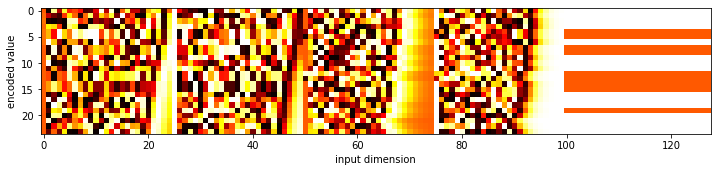

In [18]:
res_squeezed = res.squeeze(0)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xlabel("input dimension")
ax.set_ylabel("encoded value")
ax.imshow(res_squeezed.cpu(), cmap='hot')
print("input", hsqc[:,-1])
print("res", res_squeezed[:,-1])
fig.show()